<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Ссылки" data-toc-modified-id="Ссылки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ссылки</a></span></li>

# Отток клиентов

Из банка стали заметно уходить клиенты.
Маркетологи посчитали: сохранять дешевле, чем привлекать новых.
Спрогнозируем, уйдёт ли клиент из банка в ближайшее время. 
Есть исторические данные о поведении клиентов и расторжении договоров с банком. 
Построим модель с предельно большим значением *F1*-меры. 
Нужно довести метрику до 0.59
Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

**Признаки:**
 - `RowNumber` — индекс строки в данных
 - `CustomerId` — уникальный идентификатор клиента
 - `Surname` — фамилия
 - `CreditScore` — кредитный рейтинг
 - `Geography` — страна проживания
 - `Gender` — пол
 - `Age` — возраст
 - `Tenure` — сколько лет человек является клиентом банка
 - `Balance` — баланс на счёте
 - `NumOfProducts` — количество продуктов банка, используемых клиентом
 - `HasCrCard` — наличие кредитной карты
 - `IsActiveMember` — активность клиента
 - `EstimatedSalary` — предполагаемая зарплата  
 
**Целевой признак:**
 - `Exited` — факт ухода клиента

## Подготовка данных

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
!pip install -U scikit-learn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.24.2)


In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df.iloc[20:35]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
20,21,15577657,McDonald,732,France,Male,41,8.0,0.00,2,1,1,170886.17,0
21,22,15597945,Dellucci,636,Spain,Female,32,8.0,0.00,2,1,0,138555.46,0
22,23,15699309,Gerasimov,510,Spain,Female,38,4.0,0.00,1,1,0,118913.53,1
23,24,15725737,Mosman,669,France,Male,46,3.0,0.00,2,0,1,8487.75,0
24,25,15625047,Yen,846,France,Female,38,5.0,0.00,1,1,1,187616.16,0
25,26,15738191,Maclean,577,France,Male,25,3.0,0.00,2,0,1,124508.29,0
26,27,15736816,Young,756,Germany,Male,36,2.0,136815.64,1,1,1,170041.95,0
27,28,15700772,Nebechi,571,France,Male,44,9.0,0.00,2,0,0,38433.35,0
28,29,15728693,McWilliams,574,Germany,Female,43,3.0,141349.43,1,1,1,100187.43,0
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0


 - У нас есть признак `RowNumber` который дублирует индекс и не несет полезной информации, его мы удалим.  
 - Также признаки `Surname`, `CustomerId` не нужны для предсказания и их тоже можно удалить.

In [4]:
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.9 MB


In [7]:
print('Доля нулевых значений в "Tenure":', df['Tenure'].isnull().mean())

Доля нулевых значений в "Tenure": 0.0909


 - Наш датасет занимает немного памяти, поэтому её оптимизация не требуется.  
 - Признак `Tenure` имеет пропуски которые составляют порядка **9%**.  
 - Учитывая размер нашей выборки желательно их заполнить.  
 - Чтобы заполнить их более точно, а также для дальнейшего обучения, сначала закодируем строковые значения в цифры.
 - Для кодирования воспользуемся техникой `One-Hot Encoding` так как она подходит для всех моделей.

In [8]:
pd.get_dummies(df[['Geography', 'Gender']], drop_first=True).columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male'], dtype='object')

In [9]:

df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = pd.get_dummies(df[['Geography', 'Gender']], drop_first=True)
df.drop(['Geography', 'Gender'], axis=1, inplace=True)


In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:

imputer = KNNImputer(n_neighbors = 5)
columns = df.columns
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=columns)


In [12]:
df_filled.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null float64
Age                  10000 non-null float64
Tenure               10000 non-null float64
Balance              10000 non-null float64
NumOfProducts        10000 non-null float64
HasCrCard            10000 non-null float64
IsActiveMember       10000 non-null float64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null float64
Geography_Germany    10000 non-null float64
Geography_Spain      10000 non-null float64
Gender_Male          10000 non-null float64
dtypes: float64(12)
memory usage: 937.6 KB


In [13]:
print('Количество дубликатов:', df_filled.duplicated().sum())

Количество дубликатов: 0


In [14]:
df_filled.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.00,2.78,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Geography_Germany,10000.0,0.25,0.43,0.00,0.00,0.00,1.00,1.00


 - Пустые значения заполнены, категориальные данные закодированы с учетом `dummy`-ловушки.  
 - Дубликатов нет.  
 - Так как наши количественные признаки имеют разброс в значениях нужно применить масштабирование признаков.  
 - Воспользуемся стандартизацией чтобы привести признаки к одному масштабу.  

- Выделим из датасета целевую переменную чтобы ее не затронули будущие преобразования.

In [15]:

target = df_filled['Exited']
df_filled.drop(['Exited'], axis=1, inplace=True)
features = df_filled


 - Перемешаем объекты случайным образом.

In [16]:
features, target = shuffle(features, target, random_state=12345)

 - Перед стандартизацией разделим выборку, чтобы `scaler` обучился только на тренировочных данных.

In [17]:

features_train, features_valid, target_train, target_valid =\
train_test_split(features, target, test_size=0.20, random_state=12345)
features_train, features_test, target_train, target_test =\
train_test_split(features_train, target_train, test_size=0.25, random_state=12345)


In [18]:

print('Train_samples_shape: ', features_train.shape, target_train.shape)
print('Valid_samples_shape: ', features_valid.shape, target_valid.shape)
print('Test_samples_shape: ', features_test.shape, target_test.shape)


Train_samples_shape:  (6000, 11) (6000,)
Valid_samples_shape:  (2000, 11) (2000,)
Test_samples_shape:  (2000, 11) (2000,)


- Мы разбили выборки в соотношении **3:1:1**

In [19]:

features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
features_valid = features_valid.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)


In [20]:

scaler = StandardScaler()
# при масштабировании оставим без изменений бинарные признаки
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[columns])
df_scaled = pd.DataFrame(scaler.transform(features_train[columns]), columns=columns)
features_train[columns] = df_scaled[columns]
df_scaled = pd.DataFrame(scaler.transform(features_valid[columns]), columns=columns)
features_valid[columns] = df_scaled[columns]
df_scaled = pd.DataFrame(scaler.transform(features_test[columns]), columns=columns)
features_test[columns] = df_scaled[columns]


In [21]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.074487,-1.142900,1.071531,-1.227468,0.815194,1.0,1.0,0.989286,0.0,0.0,1.0
1,-0.301196,1.536557,0.711550,0.876459,-0.915579,0.0,1.0,-0.439997,1.0,0.0,0.0
2,0.422311,0.388218,1.791492,0.676639,-0.915579,1.0,1.0,1.046788,1.0,0.0,0.0
3,-0.637475,-0.568731,-1.088354,-1.227468,0.815194,1.0,1.0,-1.538316,0.0,1.0,1.0
4,0.065652,-0.951510,0.711550,0.119486,-0.915579,1.0,0.0,0.904601,0.0,1.0,1.0


In [22]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
CreditScore          6000 non-null float64
Age                  6000 non-null float64
Tenure               6000 non-null float64
Balance              6000 non-null float64
NumOfProducts        6000 non-null float64
HasCrCard            6000 non-null float64
IsActiveMember       6000 non-null float64
EstimatedSalary      6000 non-null float64
Geography_Germany    6000 non-null float64
Geography_Spain      6000 non-null float64
Gender_Male          6000 non-null float64
dtypes: float64(11)
memory usage: 515.8 KB


### Вывод

 - Мы подготовили датасет в исследованию.  
 - Оставили только нужную информацию.  
 - Заполнили пропуски.  
 - Промасштабировали признаки.  
 - Разделили датасет на тренировочную, валидационную, тестовую выборки в соотношении **3:1:1**

## Исследование задачи

- Построим первую модель и проверим на сколько она она подойдет под нашу задачу получить `F1` меру > **0.59**

In [23]:

model = RandomForestClassifier(random_state=12345)
model.fit(features_train , target_train)
predicted_valid = model.predict(features_valid)


In [24]:

print("F1:", f1_score(target_valid, predicted_valid).round(3), '\n')
print(classification_report(target_valid, predicted_valid, target_names=['Non-exited', 'Exited']))


F1: 0.56 

              precision    recall  f1-score   support

  Non-exited       0.88      0.96      0.92      1609
      Exited       0.74      0.45      0.56       391

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



 - Метрика `recall` тянет `F1`-меру вниз.  
 - Её низкое значение говорит о том что наша модель нашла только **45%** из всего имеющегося положительного класса.  
 - `F1`-мера представляет собой среднее гармоническое между `precision` и `recall`.  
 - Она стремится к нулю, если `precision` или `recall` стремится к нулю:  
 $$F=2×\frac{Precision×Recall}{Precision+Recall}$$

In [25]:

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_AUC:", roc_auc_score(target_valid, probabilities_one_valid).round(3))


ROC_AUC: 0.85


 - Критерий ROC_AUC устойчив к несбалансированным классам и может быть интерпретирован как вероятность того, что случайно  выбранный `positive` объект будет проранжирован классификатором выше (будет иметь более высокую вероятность быть `positive`), чем случайно выбранный `negative` объект.  
 - Теперь проверим первую модель на тестовой выборке.

In [26]:

predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test).round(3))
print(classification_report(target_test, predicted_test, target_names=['Non-exited', 'Exited']))
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("ROC_AUC:", roc_auc_score(target_test, probabilities_one_test).round(3))


F1: 0.626
              precision    recall  f1-score   support

  Non-exited       0.87      0.97      0.92      1558
      Exited       0.81      0.51      0.63       442

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.85      2000

ROC_AUC: 0.855


 - На тестовой выборке модель показала себя еще лучше.  
 - Проверим баланс классов на всем датасете:

In [27]:

def calculating_class_balance(positive_sample, negative_sample):
    """The function calculates the ratio of classes for binary classification.
    
    Arguments:
    (positive_sample, negative_sample).
    Return example:
    negative_class--> 3.91:1
    """
    if len(negative_sample) > len(positive_sample):
        return 'negative_class--> {}'\
                   .format(round(len(negative_sample)/len(positive_sample), 2))
    return 'positive_class--> {}'\
               .format(round(len(positive_sample)/len(negative_sample), 2))                        


In [28]:
print('Соотношение классов в датасете: {}:1'.format(calculating_class_balance(target[target == 1], target[target == 0])))

Соотношение классов в датасете: negative_class--> 3.91:1


- Виден дисбаланс классов.

### Вывод

- Нужно убрать дисбаланс классов для стабильного хорошего результата.

## Борьба с дисбалансом

- Проверим методы `взвешивание классов` и `upsampling`, которые устраняют дисбаланс.

In [29]:

model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train , target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid).round(3))
print(classification_report(target_valid, predicted_valid, target_names=['Non-exited', 'Exited']))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_AUC:", roc_auc_score(target_valid, probabilities_one_valid).round(3))


F1: 0.566
              precision    recall  f1-score   support

  Non-exited       0.88      0.97      0.92      1609
      Exited       0.77      0.45      0.57       391

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000

ROC_AUC: 0.854


 - Взвешивание классов добавило несколько тысячных долей в метрики:  
 - F1: **0.56**-->**0.566**  
 - ROC_AUC: **0.85**-->**0.854**  
 - Нам нужен больший прирост, учитывая размер нашего датасета не хотелось бы терять информацию, попробуем `upsampling`.

In [30]:

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train , target_train, 4)


In [31]:
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [32]:

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled , target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid).round(3))
print(classification_report(target_valid, predicted_valid, target_names=['Non-exited', 'Exited']))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_AUC:", roc_auc_score(target_valid, probabilities_one_valid).round(3))


F1: 0.589
              precision    recall  f1-score   support

  Non-exited       0.89      0.94      0.91      1609
      Exited       0.67      0.52      0.59       391

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

ROC_AUC: 0.848


 - `upsampling` поднял значение `F1` почти до **0.59**, остановимся на нем.  
  
 - Теперь подберем каждой модели параметры и выберем лучшую.  
 - Начнем с логистической регрессии:

In [33]:

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled , target_upsampled)
predicted_valid = model.predict(features_valid)
print("LogisticRegression F1:", f1_score(target_valid, predicted_valid).round(3))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("LogisticRegression ROC_AUC:", roc_auc_score(target_valid, probabilities_one_valid).round(3))


LogisticRegression F1: 0.479
LogisticRegression ROC_AUC: 0.758


 - Логистической регрессии нам не подходит.  
 - Проверим дерево решений:

In [34]:

best_f1_score = 0
best_depth_DT = 1
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled , target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid).round(3) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid).round(3)
        best_depth_DT = depth
print('The best depth for DecisionTreeClassifier is:', best_depth_DT)


The best depth for DecisionTreeClassifier is: 11


In [35]:

model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_DT)
model.fit(features_upsampled , target_upsampled)
predicted_valid = model.predict(features_valid)
print("DecisionTreeClassifier F1:", f1_score(target_valid, predicted_valid).round(3))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("DecisionTreeClassifier ROC_AUC:", roc_auc_score(target_valid, probabilities_one_valid).round(3))


DecisionTreeClassifier F1: 0.556
DecisionTreeClassifier ROC_AUC: 0.754


- Все еще мало.  
- Теперь случайный лес:

In [36]:

best_f1_score = 0
best_depth_RF = 1
for depth in range(1, 20):
    model = RandomForestClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled , target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid).round(3) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid).round(3)
        best_depth_RF = depth
print('The best depth for RandomForestClassifier is:', best_depth_RF)


The best depth for RandomForestClassifier is: 12


In [37]:

best_f1_score = 0
best_est = 10
for est in range(10, 100, 10):
    model = RandomForestClassifier(random_state=12345, max_depth=best_depth_RF, n_estimators=est)
    model.fit(features_upsampled , target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid).round(3) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid).round(3)
        best_est = est
print('The best n_estimators for RandomForestClassifier is:', best_est)


The best n_estimators for RandomForestClassifier is: 60


In [38]:

model = RandomForestClassifier(random_state=12345, max_depth=best_depth_RF, n_estimators=best_est)
model.fit(features_upsampled , target_upsampled)
predicted_valid = model.predict(features_valid)
print("RandomForestClassifier F1:", f1_score(target_valid, predicted_valid).round(3))
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("RandomForestClassifier ROC_AUC:", roc_auc_score(target_valid, probabilities_one_valid).round(3))


RandomForestClassifier F1: 0.614
RandomForestClassifier ROC_AUC: 0.846


 - Случайный лес показал хороший результат.  
 - Возьмем его для проверки на тестовой выборке.

### Вывод

- `upsampling` дал лучшие результаты по сравнению со взвешиванием классов.  
- Сочетание `upsampling` и `RandomForestClassifier` с подобранными гиперпараметрами помогло достичь значения метрики `F1` > **0.59**

## Тестирование модели


  RandomForestClassifier F1: 0.619 

              precision    recall  f1-score   support

  Non-exited       0.89      0.89      0.89      1558
      Exited       0.61      0.63      0.62       442

    accuracy                           0.83      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.83      0.83      0.83      2000



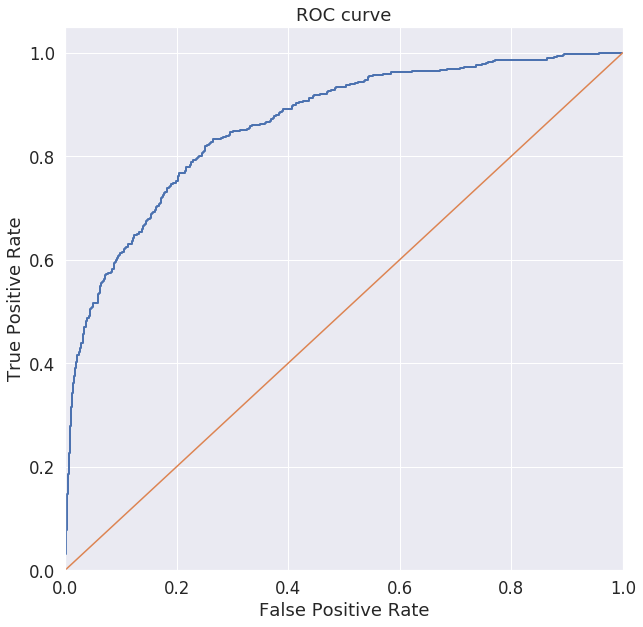

RandomForestClassifier ROC_AUC: 0.862 



In [39]:

model = RandomForestClassifier(random_state=12345, max_depth=best_depth_RF, n_estimators=best_est)
model.fit(features_upsampled , target_upsampled)
predicted_test = model.predict(features_test)

print('\n ', "RandomForestClassifier F1:", f1_score(target_test, predicted_test).round(3), '\n')

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print(classification_report(target_test, predicted_test, target_names=['Non-exited', 'Exited']))

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(features_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print("RandomForestClassifier ROC_AUC:", roc_auc_score(target_test, probabilities_one_test).round(3), '\n')


- Мы убедились на своем примере что метрика `ROC_AUC` устойчива к несбалансированной выборке.  
- Она слегка увеличилась по сравнению с первой проверкой **0.85**-->**0.862**  
- `ROC_AUC` случайной модели = **0.5**, то что у нас **0.862** означает что наша модель превосходит случайность, а значит работает.

- Выведем матрицу ошибок:

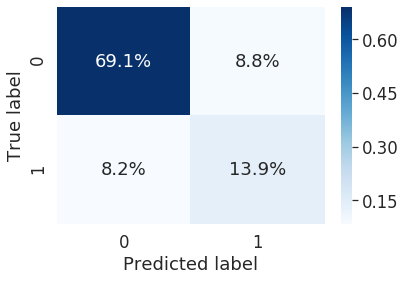

In [40]:

cf_matrix = confusion_matrix(target_test, predicted_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%', cmap='Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');


- Наша модель верно классифицирует **83%** объектов.
- Доля ошибок в положительном классе: **8,2%**.

### Общий вывод

 - Рекомендуется улучшить полноту заполнения признака `Tenure`.  
 - Для борьбы с дисбалансом классов, учитывая размер выборки, наиболее подходит метод `upsampling`.  
 - Лучшим алгоритмом стал `RandomForestClassifier` с гиперпаратрами: max_depth=**12**, n_estimators=**60**.  
 - В итоге удалось достичь показателей метрик: F1: **0.619**, ROC_AUC: **0.862**.  
 - Наша модель верно классифицирует **83%** объектов.  
 - Доля ошибок в положительном классе: **8,2%**.  

## Ссылки


В проекте использовались материалы следующих статей:  
    [Confusion Matrix Visualization](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)  
    [Метрики в задачах машинного обучения](https://habr.com/ru/company/ods/blog/328372/)   
    [Оценка классификатора (точность, полнота, F-мера)](http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html)
    